<font color="green">1. Import required libraries and read the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Apps_data+(1).csv")
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<font color="green">2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
data.shape

(10841, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
data.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [8]:
data['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [80]:
data.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [81]:
data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [82]:
data.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

<font color="green">3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.


In [83]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [84]:
data.describe(include='O')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [85]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

<font color="green">4. Check if there are any duplicate records in the dataset? if any drop them.

In [86]:
data.duplicated().sum()

483

In [87]:
data.drop_duplicates(inplace=True)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<font color="green">5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them

In [89]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [90]:
data = data[data['Category'] != '1.9']


In [91]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [92]:
data.shape

(10357, 13)

<font color="green">6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [93]:
data.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [94]:
data.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [95]:
data['Rating'].isna().sum()

1465

In [96]:
data=data.dropna(subset='Rating')

In [97]:
data['Rating'].isna().sum()

0

In [98]:
def racat(x):
    if x >3.5:
        return 'high'
    else:
        return 'low'

In [99]:
data['Rating_category']=data['Rating'].apply(racat)

In [100]:
data.Rating_category.unique()

array(['high', 'low'], dtype=object)

<font color="green">7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [101]:
data.Rating_category.value_counts()

high    8012
low      880
Name: Rating_category, dtype: int64

<font color="green">8.Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [102]:
data['Reviews'] = pd.to_numeric(data['Reviews'])


In [103]:
data['Reviews'] = data['Reviews'].astype('Int64')


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8892 non-null   object 
 1   Category         8892 non-null   object 
 2   Rating           8892 non-null   float64
 3   Reviews          8892 non-null   Int64  
 4   Size             8892 non-null   object 
 5   Installs         8892 non-null   object 
 6   Type             8892 non-null   object 
 7   Price            8892 non-null   object 
 8   Content Rating   8892 non-null   object 
 9   Genres           8892 non-null   object 
 10  Last Updated     8892 non-null   object 
 11  Current Ver      8888 non-null   object 
 12  Android Ver      8890 non-null   object 
 13  Rating_category  8892 non-null   object 
dtypes: Int64(1), float64(1), object(12)
memory usage: 1.0+ MB


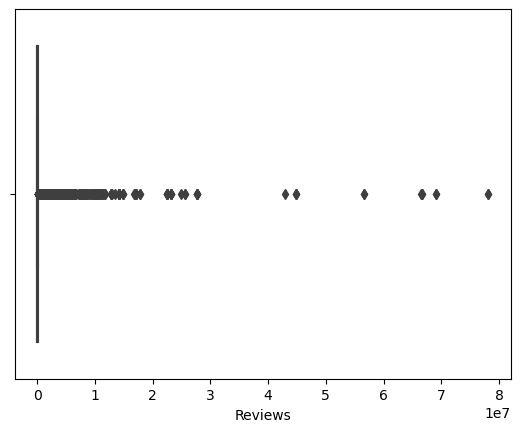

In [105]:
sns.boxplot(data['Reviews'])
plt.show()

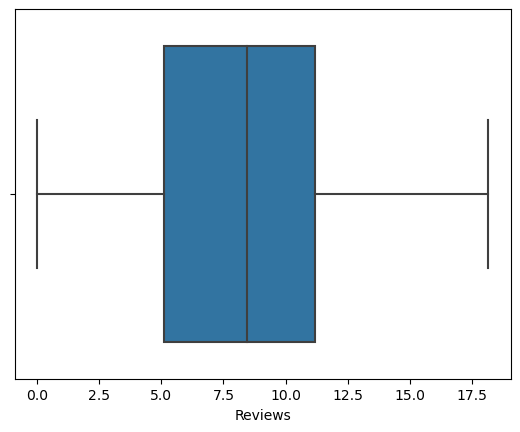

In [106]:
data['Reviews']=np.log(data['Reviews'])
sns.boxplot(data['Reviews'])
plt.show()

<font color="green">9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where
size='Varies with device')


In [107]:
data.Size.unique

<bound method Series.unique of 0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8892, dtype: object>

In [108]:
data = data[data['Size'] != 'Varies with device']


In [109]:
data.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', '9.4M', '15M', '10M', '1.2M', '26M', '8.0M', '7.9M',
       '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M', '8.6M', '2.4M',
       '27M', '2.5M', '7.0M', '16M', '3.4M', '8.9M', '3.9M', '2.9M',
       '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M', '9.8M', '52M',
       '9.0M', '6.7M', '30M', '2.6M', '7.1M', '22M', '6.4M', '3.2M',
       '8.2M', '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M',
       '3.5M', '4.0M', '2.3M', '2.1M', '42M', '9.1M', '55M', '23k',
       '7.3M', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '3.7M', '118k', '44M', '695k',
       '1.6M', '6.2M', '53M', '1.4M', '3.0M', '7.2M', '5.8M', '3.8

In [110]:
def conv(x):
    if x[-1]=='M':
        y=x[:-2]
        z=float(y)*1000000
        return z
    elif x[-1]=='k':
        y=x[:-2]
        z=float(y)*1000
        return z
        
           

In [111]:
data['Size']=data['Size'].apply(conv)

In [112]:
data.Size.unique()

array([ 1000000.,  8000000.,  2000000.,  5000000.,  3000000.,  4000000.,
        6000000.,  9000000.,  7000000.,       nan, 10000000.])

In [113]:
data['Size']= data['Size'].dropna()

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7424 non-null   object 
 1   Category         7424 non-null   object 
 2   Rating           7424 non-null   float64
 3   Reviews          7424 non-null   Float64
 4   Size             7167 non-null   float64
 5   Installs         7424 non-null   object 
 6   Type             7424 non-null   object 
 7   Price            7424 non-null   object 
 8   Content Rating   7424 non-null   object 
 9   Genres           7424 non-null   object 
 10  Last Updated     7424 non-null   object 
 11  Current Ver      7420 non-null   object 
 12  Android Ver      7422 non-null   object 
 13  Rating_category  7424 non-null   object 
dtypes: Float64(1), float64(2), object(11)
memory usage: 877.2+ KB


<font color="green"> 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [115]:
data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [116]:
data['Installs']=data['Installs'].str.replace("+","").str.replace(",","")

In [117]:
data['Installs']=data['Installs'].astype('int')

In [118]:
data['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7424, dtype: int32

<font color="green">11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type

In [119]:
data.Price.unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [120]:
data['Price']=data['Price'].str.replace("$","")

In [121]:
data.Price.unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [122]:
data['Price']=data['Price'].astype('float')

In [123]:
data.Price.unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

<font color="green">12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated',
'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [124]:
data=data.drop(['Rating','App','Genres','Last Updated','Current Ver','Android Ver'],axis=1)

In [125]:
data.columns

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Rating_category'],
      dtype='object')

<font color="green">13. Encode the categorical columns.


In [126]:
le=LabelEncoder()

In [127]:
data['Rating_category']=le.fit_transform(data['Rating_category'])
data['Type']=le.fit_transform(data['Type'])

In [128]:
data['Type']

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Type, Length: 7424, dtype: int32

In [129]:
data_2 = pd.get_dummies(data["Category"])

In [130]:
data=pd.concat([data,data_2],axis=1)

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Category             7424 non-null   object 
 1   Reviews              7424 non-null   Float64
 2   Size                 7167 non-null   float64
 3   Installs             7424 non-null   int32  
 4   Type                 7424 non-null   int32  
 5   Price                7424 non-null   float64
 6   Content Rating       7424 non-null   object 
 7   Rating_category      7424 non-null   int32  
 8   ART_AND_DESIGN       7424 non-null   uint8  
 9   AUTO_AND_VEHICLES    7424 non-null   uint8  
 10  BEAUTY               7424 non-null   uint8  
 11  BOOKS_AND_REFERENCE  7424 non-null   uint8  
 12  BUSINESS             7424 non-null   uint8  
 13  COMICS               7424 non-null   uint8  
 14  COMMUNICATION        7424 non-null   uint8  
 15  DATING               7424 non-null   

In [132]:
data=data.drop("Category",axis=1)

<font color="green">14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [135]:
X = data.drop('Rating_category',axis=1)
y = data['Rating_category']

<font color="Green">15.Split the dataset into train and test.

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [137]:
X_train

,Reviews,Size,Installs,Type,Price,Content Rating,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
4437,5.780744,NaN,5000,1,6.99,Everyone,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4761,9.404838,NaN,1000000,0,0.00,Everyone,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10087,1.94591,3000000.0,1000,0,0.00,Everyone,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
675,10.635976,8000000.0,500000,0,0.00,Mature 17+,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4026,6.2106,5000000.0,50000,0,0.00,Everyone,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10322,2.197225,2000000.0,1000,0,0.00,Everyone,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2580,13.201045,5000000.0,10000000,0,0.00,Teen,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5048,7.705713,4000000.0,5000000,0,0.00,Everyone,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2633,8.209852,5000000.0,100000,0,0.00,Mature 17+,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


<font color="green">16. Standardize the data, so that the values are within a particular range

In [139]:
data.describe()

,Reviews,Size,Installs,Type,Price,Rating_category,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
count,7424.000000,7.167000e+03,7.424000e+03,7424.000000,7424.000000,7424.000000,7424.000000,7424.000000,7424.000000,7424.000000,...,7424.000000,7424.000000,7424.000000,7424.000000,7424.000000,7424.000000,7424.000000,7424.000000,7424.000000,7424.000000
mean,7.608128,3.689270e+06,7.823918e+06,0.073680,1.116599,0.111126,0.007947,0.008486,0.004984,0.019262,...,0.037581,0.030307,0.031115,0.021417,0.022899,0.031250,0.085399,0.019801,0.015625,0.006870
std,3.734661,2.436781e+06,4.630411e+07,0.261267,17.708566,0.314309,0.088798,0.091734,0.070425,0.137453,...,0.190193,0.171443,0.173641,0.144780,0.149591,0.174004,0.279493,0.139324,0.124028,0.082604
min,0.000000,1.000000e+06,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.595120,2.000000e+06,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.633854,3.000000e+06,1.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.515825,5.000000e+06,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17.619812,1.000000e+07,1.000000e+09,1.000000,400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [140]:
data=data.drop("Content Rating",axis=1)

In [141]:
data_cpy = data.copy()

In [142]:
ss = StandardScaler()

In [145]:
data_cpy = ss.fit_transform(data_cpy)

In [146]:
data_cpy

array([[-0.67995305, -1.10369288, -0.16876352, ..., -0.14212893,
        -0.12598816, -0.08316929],
       [-0.19653147, -1.10369288, -0.1581806 , ..., -0.14212893,
        -0.12598816, -0.08316929],
       [ 1.0099001 ,  1.76914972, -0.06099044, ..., -0.14212893,
        -0.12598816, -0.08316929],
       ...,
       [-1.0632313 ,  0.53793146, -0.16887151, ..., -0.14212893,
        -0.12598816, -0.08316929],
       [-1.66608206, -0.28288071, -0.16897734, ..., -0.14212893,
        -0.12598816, -0.08316929],
       [ 1.41571255, -1.10369288,  0.04699861, ..., -0.14212893,
        -0.12598816, -0.08316929]])

In [147]:
data

,Reviews,Size,Installs,Type,Price,Rating_category,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,5.068904,1000000.0,10000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.874198,1000000.0,500000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.379508,8000000.0,5000000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12.281384,2000000.0,50000000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.874198,2000000.0,100000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,3.78419,NaN,1000,0,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10834,1.94591,2000000.0,500,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,3.637586,5000000.0,5000,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,1.386294,3000000.0,100,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
